In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
path = os.path.join(os.getcwd(), "2T9KJKD2CTGOG")

df = pd.DataFrame()
for file in os.listdir(path):
    if file == "compiled.json":
        continue
    
    aux = pd.read_json(os.path.join(path, file))
    date = file.replace(".json","")
    aux = aux.assign(Data=date)
    df = pd.concat([df, aux])


df.reset_index(inplace=True)
df.to_json(os.path.join(path, "compiled.json"))

In [19]:
df = pd.read_json(os.path.join(path, "compiled.json"))
df["Data"] = pd.to_datetime(df['Data'], format='%Y-%m-%d')
df

,index,Título,Preço,Data
0,0,Expiração,29.95,2023-01-05
1,1,O fim da morte: 3,74.30,2023-01-05
2,2,A floresta sombria: 2,33.95,2023-01-05
3,3,O problema dos três corpos: 1,29.90,2023-01-05
4,4,O sol é para todos,30.00,2023-01-05
...,...,...,...,...
760,80,It: A coisa,68.90,2023-01-30
761,81,Sob a redoma,60.99,2023-01-30
762,82,A música do silêncio (A Crônica do Matador do ...,22.90,2023-01-30
763,83,O temor do sábio (A Crônica do Matador do Rei ...,71.51,2023-01-30


In [20]:
# Sort by date and get their unique values
dater = df.sort_values('Data', ascending=False).drop_duplicates(['Data'])

# Get the latest date and the second latest date
latest = dater.at[dater.index[0],'Data']
slatest = dater.at[dater.index[1],'Data']
print(latest, slatest, sep="\n")

2023-01-30 00:00:00
2023-01-26 00:00:00


In [21]:
# Get only the rows that are in the latest and in the second latest date
# Retornar apenas os registros que possuem a primeira e segunda data mais recente
df = df[df['Data'].isin([latest, slatest])] 

# If you want the one that are NOT in the first and second latest data:
# df = df[~df['Data'].isin([latest, slatest])] 

df


,index,Título,Preço,Data
595,0,Expiração,0.00,2023-01-26
596,1,O fim da morte: 3,82.27,2023-01-26
597,2,A floresta sombria: 2,33.95,2023-01-26
598,3,O problema dos três corpos: 1,51.92,2023-01-26
599,4,O sol é para todos,45.90,2023-01-26
...,...,...,...,...
760,80,It: A coisa,68.90,2023-01-30
761,81,Sob a redoma,60.99,2023-01-30
762,82,A música do silêncio (A Crônica do Matador do ...,22.90,2023-01-30
763,83,O temor do sábio (A Crônica do Matador do Rei ...,71.51,2023-01-30


In [22]:
# Get separate dataframes to compare the prices
df1 = df[df['Data'].isin([latest])].sort_values("Título")
df2 = df[df['Data'].isin([slatest])].sort_values("Título")

for i, j in zip(df1.index, df2.index):
    if df1["Preço"][i] < df2["Preço"][j]:
        print(df2["Título"][j], "-", df2["Preço"][j], "->", df1["Preço"][i], sep=" ")
    


1q84 - livro 3 - 50.3 -> 48.9
A hipótese do amor (Sucesso do TikTok) - 33.8 -> 29.9
A paciente silenciosa - 35.9 -> 27.9
Box Percy Jackson e os Olimpianos - Capa Nova: (Série Percy Jackson e os Olimpianos) - 199.9 -> 194.99
Box Trilogia Sprawl - 116.68 -> 97.99
GUERRA CIVIL - MARVEL: Uma História Do Universo Marvel - 20.14 -> 20.11
Grande sertão: veredas - 49.9 -> 48.99
Helena - 17.0 -> 11.99
Hereges de Duna: livro 5 - 54.99 -> 51.99
It: A coisa - 72.89 -> 68.9
Kafka à beira-mar - 55.9 -> 53.99
LAÇOS DE FAMÍLIA (EDIÇÃO COMEMORATIVA) - 39.9 -> 37.0
Mentes Inquietas: TDAH: desatenção, hiperatividade e impulsividade - 39.9 -> 34.9
Mentes ansiosas: O medo e a ansiedade nossos de cada dia - 39.9 -> 38.99
Mentes perigosas: O psicopata mora ao lado (Edição comemorativa de 10º aniversário) - 49.3 -> 39.9
Mentes que amam demais: O jeito borderline de ser (Edição revista, atualizada e ampliada) - 39.9 -> 34.9
Norwegian Wood - 44.8 -> 42.99
O iluminado: Coleção Biblioteca Stephen King - 59.72 -> 

In [23]:
dfgroup = df.groupby("Data", group_keys=True)
# dfgroup = df.groupby("Título", group_keys=True).apply(lambda x: x)

dfgroup

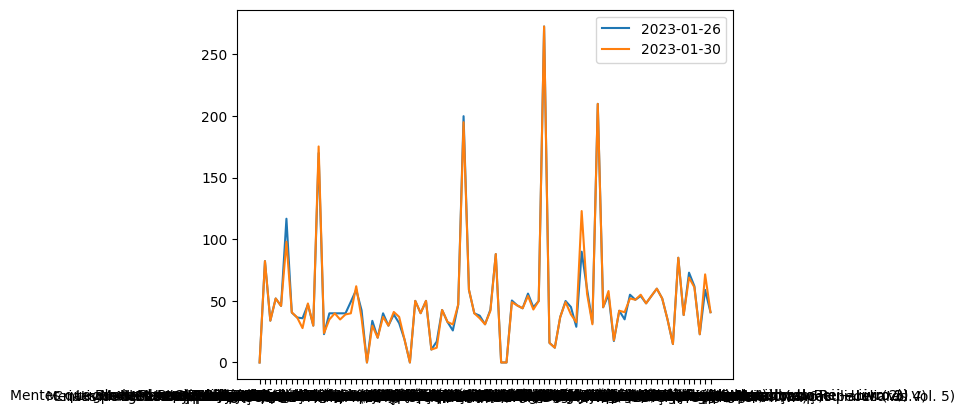

In [24]:
# Iterate through each group in the groupby dataframe
for group, data in dfgroup:
    date = group.strftime('%Y-%m-%d')
    # for i, row in data.iterrows():
    plt.plot(data["Título"], data["Preço"], label=date)
    # print(row["Título"])

plt.legend()
plt.show()